In [1]:
import requests
import json
import pprint
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
import requests
import json
import pprint

response = requests.get("https://data.ntpc.gov.tw/api/datasets/71CD1490-A2DF-4198-BEF1-318479775E8A/json")
content = response.content
json_tree = json.loads(content)
pprint.pprint(json_tree)

for bike_rent_records in json_tree:
    leftRatio = float(bike_rent_records["sbi"]) / float(bike_rent_records["tot"]) * 100
    print("ID:{0} Left:{2:0.1f}% Name:{1}".format(bike_rent_records["sno"], bike_rent_records["aren"], leftRatio))

[{'act': '1',
  'ar': '新北市新店區中正路700巷3號',
  'aren': 'No. 3, Lane 700 Chung Cheng Road, Xindian District',
  'bemp': '20',
  'lat': '24.99116',
  'lng': '121.53398',
  'mday': '20201022181401',
  'sarea': '新店區',
  'sareaen': 'Xindian Dist.',
  'sbi': '18',
  'sna': '大鵬華城',
  'snaen': 'Dapeng Community',
  'sno': '1001',
  'tot': '38'},
 {'act': '1',
  'ar': '南昌街/新昌路口(西側廣場)',
  'aren': 'Nanchang St./Xinchang Rd.',
  'bemp': '48',
  'lat': '25.068914',
  'lng': '121.662748',
  'mday': '20201022181340',
  'sarea': '汐止區',
  'sareaen': 'Xizhi Dist.',
  'sbi': '8',
  'sna': '汐止火車站',
  'snaen': 'Xizhi Railway Station',
  'sno': '1002',
  'tot': '56'},
 {'act': '1',
  'ar': '新台五路一段/仁愛路口(新台五路側汐止地政事務所前機車停車場)',
  'aren': 'Sec. 1, Xintai 5th Rd./Ren’ai Rd.',
  'bemp': '19',
  'lat': '25.064162',
  'lng': '121.658301',
  'mday': '20201022181319',
  'sarea': '汐止區',
  'sareaen': 'Xizhi Dist.',
  'sbi': '25',
  'sna': '汐止區公所',
  'snaen': 'Xizhi Dist. Office',
  'sno': '1003',
  'tot': '46'},
 {'act': '1

In [5]:
location= [i['sareaen'] for i in json_tree]
left =  np.array([int(i['tot'])for i in json_tree])-np.array([int(i['sbi'])for i in json_tree])

df = pd.DataFrame({'District': location,'Available bike': left})
df=df.groupby(by=["District"]).sum().reset_index()
df

,District,Available bike
0,Luzhou Dist.,27
1,Sanchong Dist.,135
2,Xindian Dist.,115
3,Xinzhuang Dist.,58
4,Xizhi Dist.,263


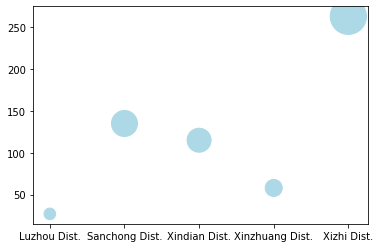

In [6]:
dist= df['District'].values
left= df['Available bike'].values
plt.scatter(dist,left,s=left*5,c='lightblue')